In [25]:
# import tp1-inpainting-etu

%matplotlib inline
from math import sqrt, log
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
import seaborn as sns

# Génération aléatoire

In [26]:
def gen_linear(a, b, eps, nbex):
    x = np.random.uniform(-5, 5, (nbex, len(a)))
    noise = np.random.normal(scale=eps, size=(nbex, 1))
    a = np.array(a)
    a= a.reshape(len(a),1)
    y = np.add(np.dot(x,a), noise)
    y = np.add(y, b)
    return x,y

def gen_linear_no_noise(a, b, nbex):
    x = np.random.uniform(-5, 5, (nbex, len(a)))
    a = np.array(a)
    a= a.reshape(len(a),1)
    y = np.dot(x,a)
    y = np.add(y, b)
    return x,y

In [27]:
# Parameters values
a = [1, 1, 1]
#a = [1]
b = 5
eps_0 = sqrt(1)
n = 500


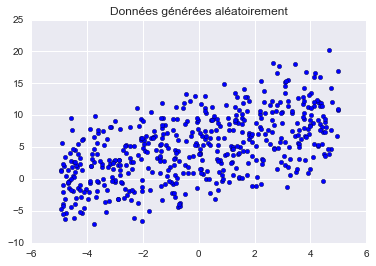

In [28]:
x, y = gen_linear(a, b, eps_0, n) 
plt.figure()
plt.scatter(x[:,0], y)
plt.title("Données générées aléatoirement")

# Données réelles : Boston Housing


In [29]:
def read_file (fn ):
    with open (fn) as f:
        names =f. readline ()
        X=np. array ([[ float (x) for x in l. strip (). split (" ")] 
                      for l in f. readlines ()])
    return X[: ,: -1] ,X[: , -1]. reshape ( -1)

In [30]:
df = read_file("housing.csv")

In [31]:
x_df, y_df = df[0], df[1]

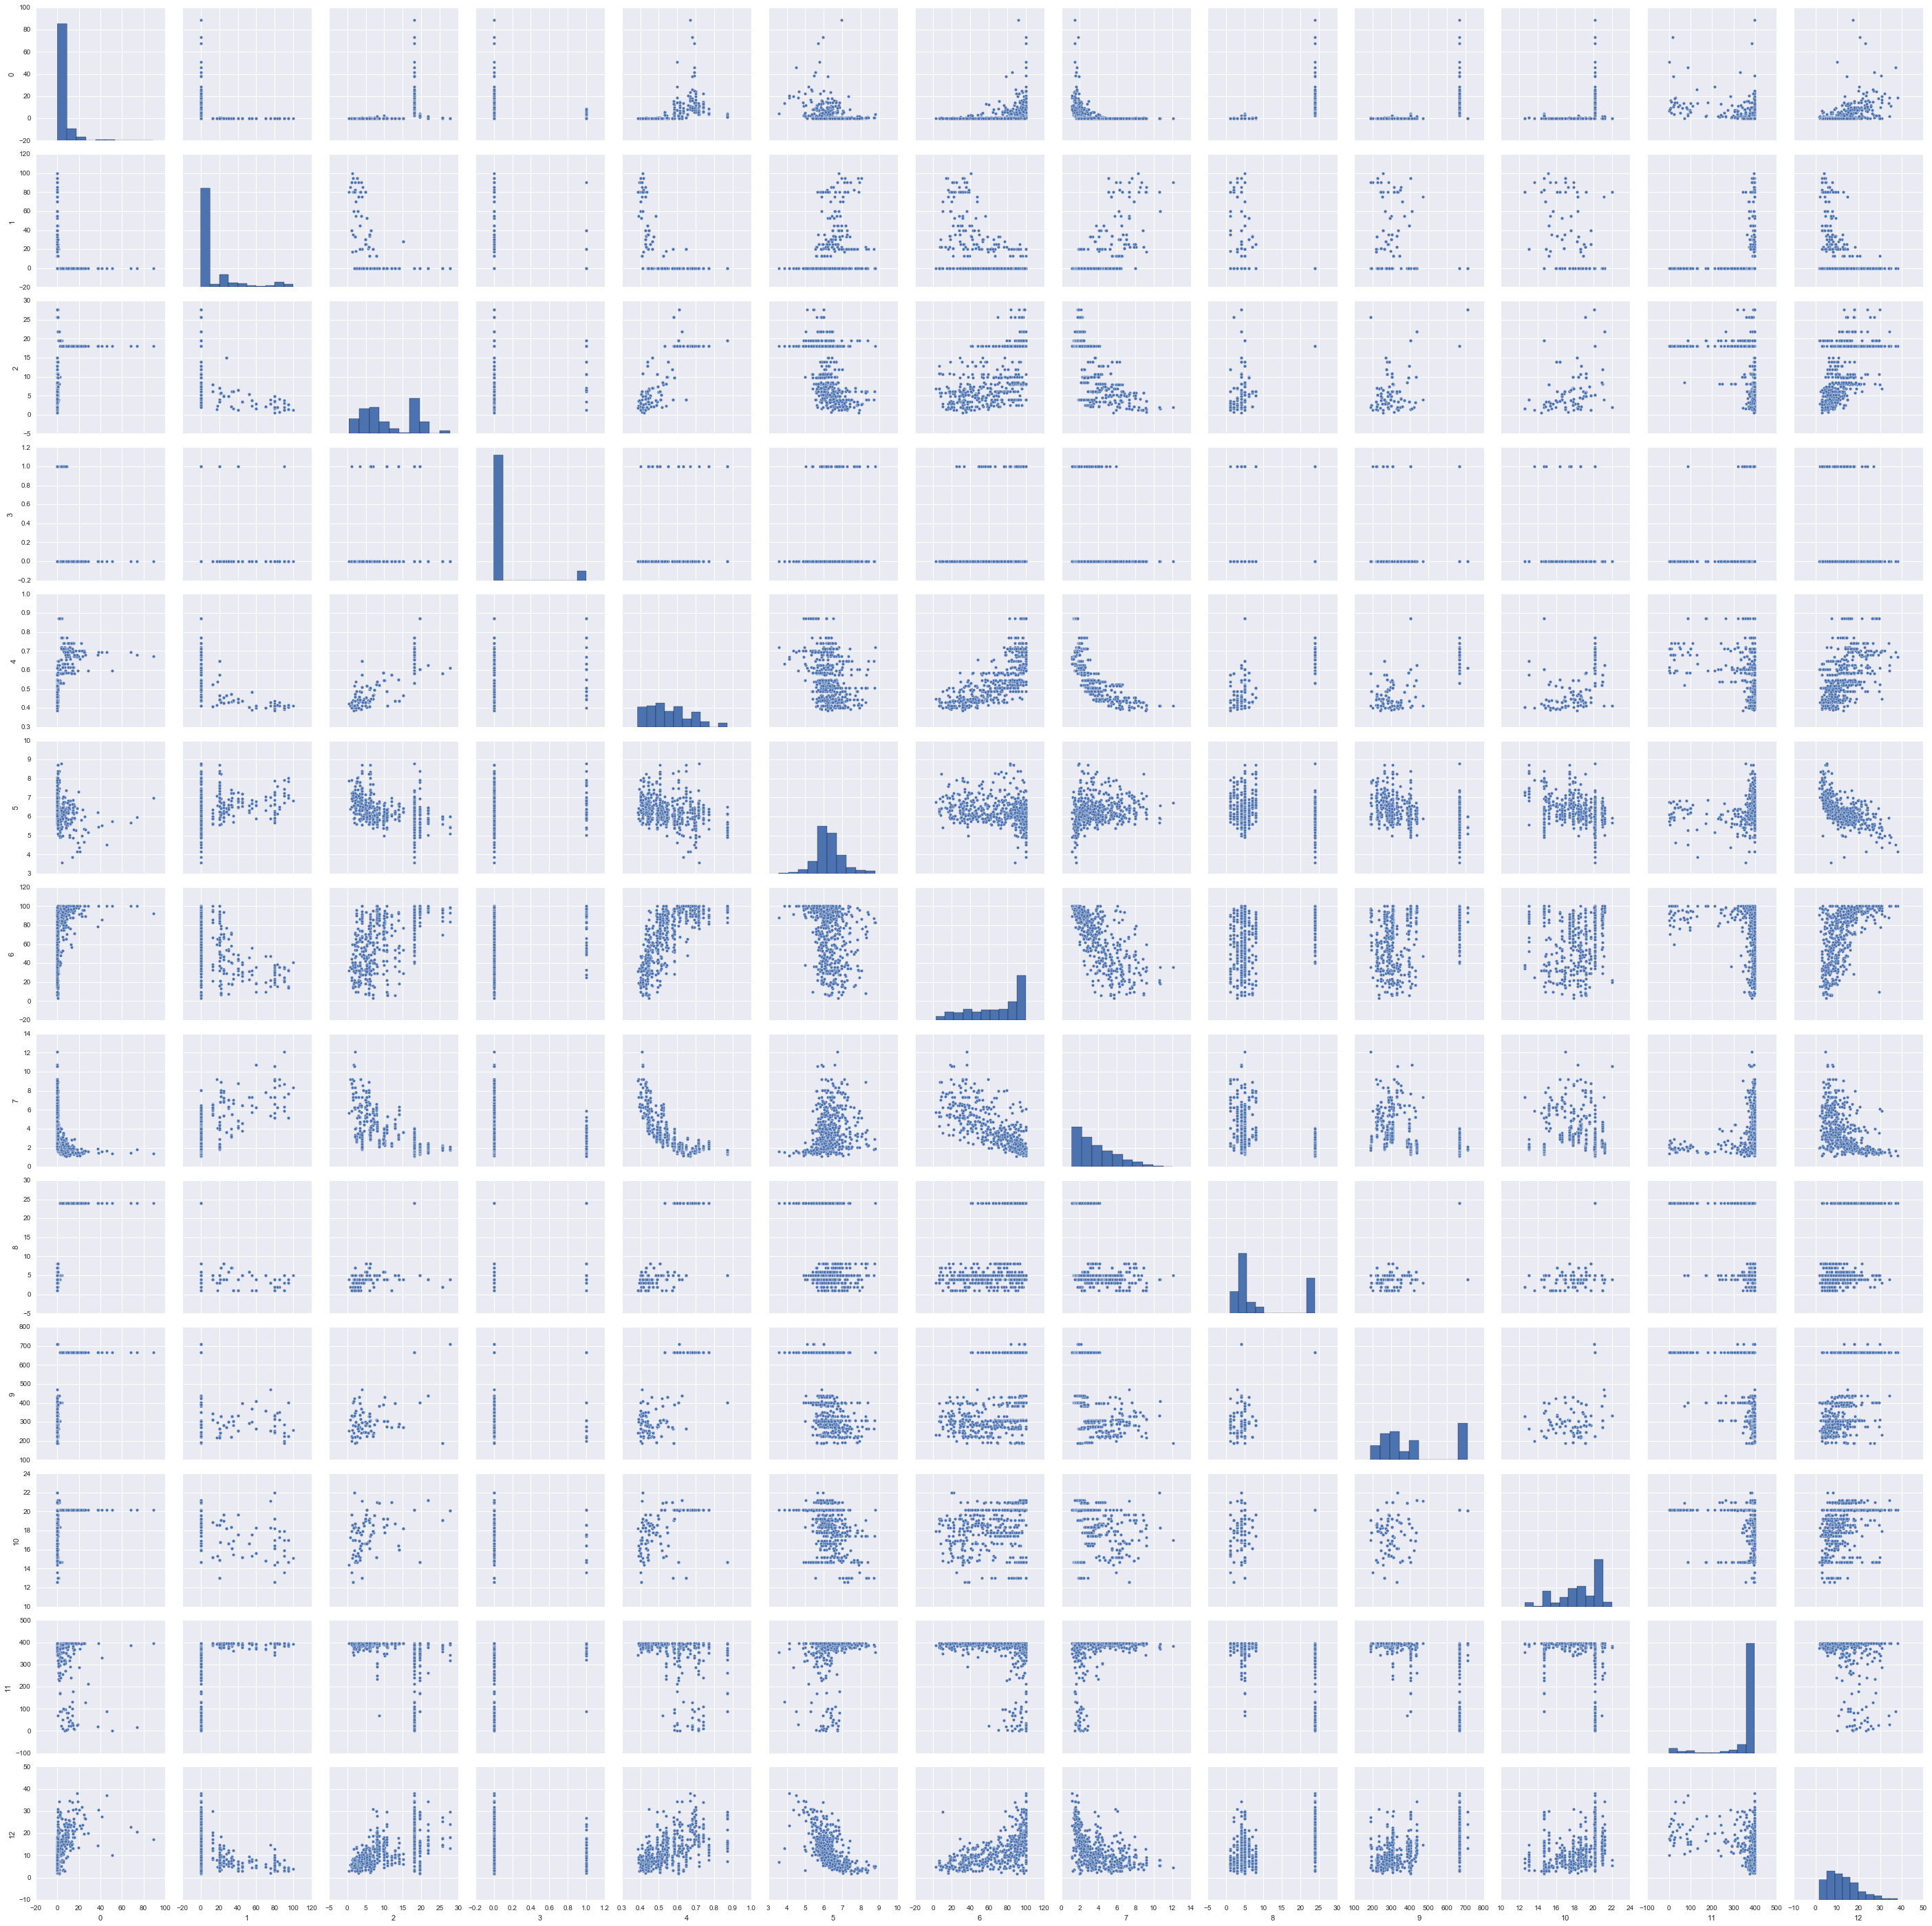

In [32]:
# Pour visualiser le diagramme de corrélations de nos données, on s'est permis d'utiliser la bibliothèqe Seaborn
# qui le fait très bien
m_df = pd.DataFrame(x_df)
sns.pairplot(m_df, size=3)

On observe que certaines données sont extrêmement corrélées, et donc que certaines variables explicatives apportent vraisemblablement la même information

# Régression linéaire

Préambule:

On écrit $x^*$ le vecteur $(1, x)$ où x est un vecteur de taille d. $x^*$ est donc un vecteur de $R^{d+1}$.

On a donc aussitôt:
$$f_w(x) = w.x^*$$

De même, si l'on note $X$ la matrice $(x^*_1, ..., x^*_N)$ où $x^*_i$ est le vecteur i généralisé on obtient:
$$f_w(X) = X \times (w_0, w_1, ..., w_d) = X \times w$$

Calcul de l'erreur des moindres carrés:

Pour tout $x,y \in X,Y$ point de la base d'apprentissage:
$$l(y, f_w(x)) = (y - f_w(x))^2$$

Donc pour l'ensemble de la base d'apprentissage:
$$R = \frac{1}{N} \sum_1^N (y_i -f_w(x_i))^2$$
$$R = \frac{1}{N} (Y-X \times w)^2 $$

On peut remarquer que ce risque est fortement convexe. L'optimum $w$ est donc obtenu là où le gradient s'annule. Après calcul, on trouve l'estimateur des moindres carrés: 

$$w = (X^TX)^{-1}X^TY$$

In [47]:
def predict(w, X):
    return np.dot(X, w)  # A tester

def mse(yhat, y):
    """Renvoit l'erreur entre yhat et y"""
    assert(len(yhat) == len(y))
    n = len(yhat)
    return ((1/n)*(np.dot(np.transpose(y-yhat), (y-yhat))))
    #return ((1/n)*(np.dot(np.transpose(y-yhat), (y-yhat))))


def regress(X, Y):
    """Renvoit l'estimateur w_hat estimateur des moindres carrés
    en régression linéaire sur la base d'apprentissage (X, Y)"""
    mat_1 = np.linalg.pinv(np.dot(np.transpose(X), X))
    mat_2 = np.dot(np.transpose(X), Y)
    return np.dot(mat_1, mat_2)

## Utilisation de la régression linéaire sur des données simulées

In [10]:
# Tout d'abord nous devons modifier x pour le rendre conforme a nos attentes
def resize(x):
    return np.hstack((np.ones(len(x)).reshape(-1, 1), x))

x_sim = resize(x)
print(x_sim[:4, :])  # Verifier que x_sim a la forme demandée
y_sim = y

[[ 1.          0.88142965 -3.1080293   1.55811302]
 [ 1.          3.22756306  1.53392172 -0.54178581]
 [ 1.         -0.31047551 -1.85910975 -4.43324213]
 [ 1.         -2.114537   -4.87500102  1.25881385]]


In [11]:
w_estim = regress(x_sim, y_sim)
print(w_estim)
# On s'apercoit que l'estimateur des moindres carrés est plutôt bon et est proche du résultat attendu 
print(mse(np.dot(x_sim, w_estim), y_sim))

[[ 4.99687107]
 [ 0.97179788]
 [ 0.97850126]
 [ 1.00301951]]
0.949967443555


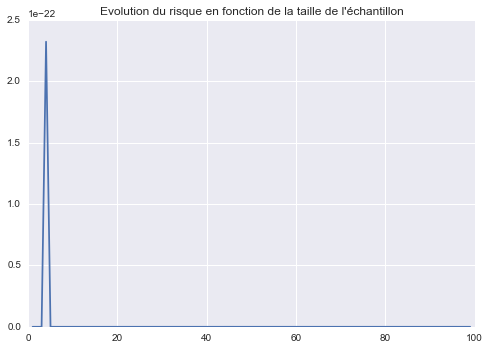

In [12]:
# Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
nbexs = [i for i in range(1, 100)]
risk = []
for n in nbexs:
    x_sim, y_sim = gen_linear_no_noise(a, b, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim))
plt.plot(nbexs, risk)
plt.title("Evolution du risque en fonction de la taille de l'échantillon")

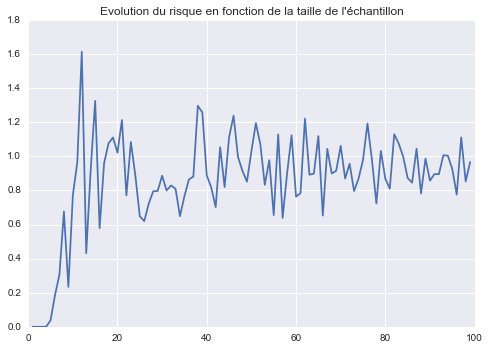

In [13]:
# Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
nbexs = [i for i in range(1, 100)]
risk = []
for n in nbexs:
    x_sim, y_sim = gen_linear(a, b, 1, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim))
plt.plot(nbexs, risk)
plt.title("Evolution du risque en fonction de la taille de l'échantillon")

On peut remarquer que le risque converge vers $\epsilon$, la variance du bruit gaussien

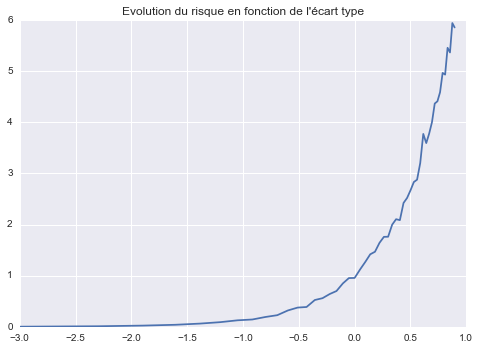

In [14]:
# Evolution du risque en fonction de la variance pour l'estimateur des moindres carrés
n = 1000
stds = [0.05*i for i in range(1, 50)]
risk = []
for std in stds:
    x_sim, y_sim = gen_linear(a, b, std, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim))
log_stds = [log(std) for std in stds]
plt.plot(log_stds, risk)
plt.title("Evolution du risque en fonction de l'écart type")

On remarque que quand l'écart-type est faible (autrement dit moins il y a de brut), le risque a tendance à tendre vers 0.
C'est logique.

In [15]:
w_true = np.array([5,1,1,1]).reshape(-1, 1)

In [16]:
# Ajout de dimensions aléatoires
x_sim, y_sim = gen_linear(a, b, 1, 500)
x_sim = resize(x_sim)
x_sim_alea = np.hstack((x_sim, np.random.rand(len(x_sim), 2)))  # Ajout de 2 dimensions aléatoires

w = regress(x_sim, y_sim)
w_alea = regress(x_sim_alea, y_sim)

print("Estimateur normal:")
print(w)
print("Ecart quadratique sur les poids")
print(np.dot(np.transpose(w-w_true), w-w_true))
print("\n \n Estimateur avec 2 dimensions d'explication aléatoires supplémentaires:")
print(w_alea)
print("Ecart quadratique sur les poids")
print(np.dot(np.transpose(w_alea[:4]-w_true), w_alea[:4]-w_true))

# norm = []
# for ind in range(1, 500):
#     x_sim, y_sim = gen_linear(a, b, 1, 500)
#     x_sim = resize(x_sim)
#     x_sim_alea = np.hstack((x_sim, np.random.rand(len(x_sim), 2)))  # Ajout de 2 dimensions aléatoires

#     w = regress(x_sim, y_sim)
#     w_alea = regress(x_sim_alea, y_sim)
#     norm.append([np.dot(np.transpose(w-w_true), w-w_true), np.dot(np.transpose(w_alea[:4]-w_true), w_alea[:4]-w_true)])
# df = pd.DataFrame(columns=['Without random dimensions', 'With'], data=norm)
# sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")



Estimateur normal:
[[ 5.09528184]
 [ 0.96593773]
 [ 0.98416627]
 [ 1.01188349]]
Ecart quadratique sur les poids
[[ 0.01063079]]

 
 Estimateur avec 2 dimensions d'explication aléatoires supplémentaires:
[[ 5.16655591]
 [ 0.96405419]
 [ 0.98430083]
 [ 1.01243846]
 [ 0.16234318]
 [-0.31142475]]
Ecart quadratique sur les poids
[[ 0.02943415]]


## Application à la base de données réelle

Ainsi, on remarque que l'écart quadratique sur les poids en ajoutant des dimensions a tendance a être plus grand que sans dimensions aléatoires.

In [17]:
x_train = resize(x_df)
y_train = y_df
w = regress(x_train, y_train)
print(w)

[  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


Interprétation des poids :
On peut grossièrement supposer que si les variables explicatives ont même ordre de grandeur, l'amplitude des coefficients reflète le poids des variables explicatives sur la variable à expliquer, et donc le degré d'information qu'elle apporte.

In [18]:
# On multiplie par 10 un des coefficients
index = 7
x_train[:, index] = 10*x_train[:, index]
w = regress(x_train, y_train)
print(w)

[  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224640e-05
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


INTERPREATION A FAIRE!!!

Afin d'éviter ces problèmes, il peut être pertinent de normaliser les valeurs des paramètres.

In [62]:
# Normalisation des données
def normalize_data(x):
    lin, col = np.shape(x)
    x_ans = np.zeros((lin, col))
    for i_col in range(col):
        x_ans[:, i_col] = (x[:, i_col] - np.mean(x[:, i_col]))/np.std(x[:, i_col])
    return x_ans

x_df = normalize_data(x_df)

A FAIRE TRACE DE l'ERREUR EN FONCTION DU NOMBRE DE DONNEES

Utiliser notre ensemble d'apprentissage pour estimer l'erreur des moindres carrés n'est pas judicieux car nous avons justement utilisé cet ensemble pour fitter notre modèle. 
Pour pallier à cette faible, nous pouvons recourrir à un protocole de validation simple, en scindant notre ensemble de départ en un **ensemble d'entraînemenet** et un **ensemble de validation**

In [54]:
np.random.shuffle(x_df)  # Verifier que je l'ai bien fait dans le bon sens

def mse_simple_valid(fraction):
    index_80 = int(len(x_df)*fraction)
    x_train, x_valid = x_df[:index_80], x_df[index_80:]
    y_train, y_valid = y_df[:index_80], y_df[index_80:]
    w = regress(x_train, y_train)
    y_hat = predict(w, x_valid)
    return mse(y_hat, y_valid)

print(mse_simple_valid(0.8))

96.4256402488


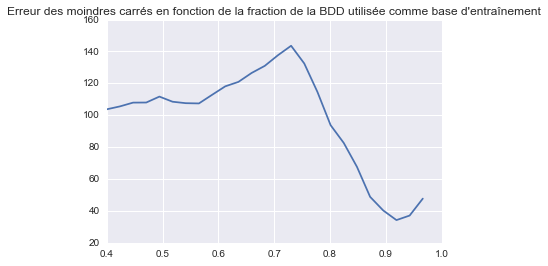

In [59]:
# Generalisation : Tracé de l'erreur des moindres carrés en fonction de la taille
# de l'ensemble d'entraînement
n_points = 25
mses = []
fracs = []
for index in range(n_points):
    frac = 0.4 + 0.59*index/n_points
    fracs.append(frac)
    mses.append(mse_simple_valid(frac))
plt.plot(fracs, mses)
plt.title("Erreur des moindres carrés en fonction de la fraction de la BDD utilisée comme base d'entraînement")

INTERPRETATION

# Ridge Regression

# Lasso

# Bonus